In [31]:
import torch.nn.functional as F
import torch
import numpy as np
import torch.nn as nn

In [32]:
embed_size = 300
batch_size = 16
seq_lenght = 20

In [33]:
## Standard Self Attention

$$
y_{i} = \sum w_{ij}*x_{i}
$$

$$
w_{ij}'=x_{i}*x_{j}^\intercal
$$

$$
w_{ij}=\frac{\exp{w_{ij}'}}{\sum_{j}\exp{w_{ij}'}}
$$

In [34]:
x = torch.rand(batch_size, seq_lenght, embed_size)
x.shape

torch.Size([16, 20, 300])

In [35]:
raw_w = torch.bmm(x,x.transpose(1,2))
raw_w.shape

torch.Size([16, 20, 20])

In [36]:
w = F.softmax(raw_w, dim=2)
w.shape

torch.Size([16, 20, 20])

In [37]:
y = torch.bmm(w,x)
y.shape

torch.Size([16, 20, 300])

In [38]:
def raw_self_attn(x):
    raw_w = torch.bmm(x,x.transpose(1,2))
    w = F.softmax(raw_w, dim=2)
    y = torch.bmm(w,x)
    return y, w

In [39]:
out, att_m = raw_self_attn(x)

In [40]:
out.shape

torch.Size([16, 20, 300])

In [41]:
att_m.shape

torch.Size([16, 20, 20])

In [42]:
from matplotlib.pyplot import imshow

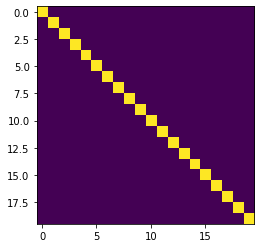

In [43]:
imshow(att_m[0])

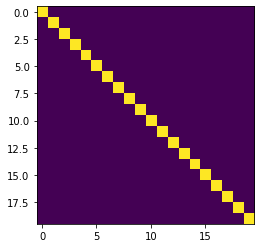

In [44]:
imshow(att_m[-1])

## Benefits of Self Attention
- Best of both worlds (CNNs and RNNs)
    - work with long sequences inputs (RNNs)
    - paralelization (CNNs)

In [45]:
x = torch.rand(batch_size, seq_lenght, embed_size)
x

tensor([[[0.0856, 0.1917, 0.3817,  ..., 0.7692, 0.3625, 0.0669],
         [0.0514, 0.7932, 0.8035,  ..., 0.0321, 0.0751, 0.6124],
         [0.6006, 0.7362, 0.3930,  ..., 0.0893, 0.9119, 0.8380],
         ...,
         [0.7212, 0.7860, 0.7201,  ..., 0.3659, 0.8427, 0.4664],
         [0.1301, 0.8760, 0.3244,  ..., 0.0035, 0.6172, 0.0257],
         [0.1938, 0.7037, 0.6439,  ..., 0.9373, 0.3727, 0.9019]],

        [[0.8212, 0.3045, 0.3686,  ..., 0.7035, 0.9349, 0.6780],
         [0.9223, 0.7732, 0.5127,  ..., 0.9006, 0.6987, 0.3132],
         [0.8569, 0.7703, 0.9948,  ..., 0.4629, 0.9225, 0.0412],
         ...,
         [0.6115, 0.8857, 0.3158,  ..., 0.2340, 0.1191, 0.8765],
         [0.6330, 0.0824, 0.1951,  ..., 0.0161, 0.6999, 0.9743],
         [0.7470, 0.3522, 0.9998,  ..., 0.5571, 0.9565, 0.8251]],

        [[0.6558, 0.7204, 0.9954,  ..., 0.8924, 0.0433, 0.8419],
         [0.4929, 0.2820, 0.0615,  ..., 0.4065, 0.2151, 0.1029],
         [0.4674, 0.8735, 0.0567,  ..., 0.3055, 0.0181, 0.

In [46]:
raw_w = torch.bmm(x,x.transpose(1,2))
w = F.softmax(raw_w, dim=2)

In [47]:
w[0]

tensor([[1.0000e+00, 3.3188e-10, 1.0226e-13, 1.5844e-12, 1.8791e-13, 2.9940e-12,
         1.1840e-14, 1.8750e-11, 3.7648e-15, 1.9065e-11, 4.8581e-10, 1.5364e-12,
         2.5318e-13, 5.0394e-14, 1.0582e-12, 7.1780e-12, 8.3139e-12, 1.0477e-11,
         3.2748e-12, 1.3927e-12],
        [5.1502e-13, 1.0000e+00, 3.2254e-13, 3.4809e-13, 1.8266e-14, 2.4460e-13,
         2.8184e-16, 1.6522e-12, 1.6795e-14, 8.8632e-13, 1.0680e-11, 1.1164e-12,
         1.5191e-14, 4.1144e-15, 2.3144e-14, 4.1371e-15, 2.8554e-13, 4.4913e-12,
         1.5573e-12, 1.4297e-13],
        [1.0132e-13, 2.0592e-10, 1.0000e+00, 1.8812e-12, 9.8147e-14, 1.4264e-11,
         1.2003e-14, 3.6623e-12, 1.7419e-12, 2.8750e-12, 1.6348e-09, 8.3222e-13,
         1.9178e-12, 8.5284e-13, 1.2768e-12, 2.2190e-13, 4.1252e-11, 2.5239e-11,
         4.6964e-13, 5.9951e-12],
        [3.8560e-13, 5.4591e-11, 4.6212e-13, 1.0000e+00, 1.3654e-12, 7.5007e-11,
         6.2557e-14, 1.5267e-11, 1.7706e-13, 1.7627e-11, 3.8040e-09, 3.6556e-12,
       

# Improvements
- Scaled Self Attention
- Queries, Keys, Values
- Multi-Head Attention

### 1. Scaled Self Attention

In [48]:
x

tensor([[[0.0856, 0.1917, 0.3817,  ..., 0.7692, 0.3625, 0.0669],
         [0.0514, 0.7932, 0.8035,  ..., 0.0321, 0.0751, 0.6124],
         [0.6006, 0.7362, 0.3930,  ..., 0.0893, 0.9119, 0.8380],
         ...,
         [0.7212, 0.7860, 0.7201,  ..., 0.3659, 0.8427, 0.4664],
         [0.1301, 0.8760, 0.3244,  ..., 0.0035, 0.6172, 0.0257],
         [0.1938, 0.7037, 0.6439,  ..., 0.9373, 0.3727, 0.9019]],

        [[0.8212, 0.3045, 0.3686,  ..., 0.7035, 0.9349, 0.6780],
         [0.9223, 0.7732, 0.5127,  ..., 0.9006, 0.6987, 0.3132],
         [0.8569, 0.7703, 0.9948,  ..., 0.4629, 0.9225, 0.0412],
         ...,
         [0.6115, 0.8857, 0.3158,  ..., 0.2340, 0.1191, 0.8765],
         [0.6330, 0.0824, 0.1951,  ..., 0.0161, 0.6999, 0.9743],
         [0.7470, 0.3522, 0.9998,  ..., 0.5571, 0.9565, 0.8251]],

        [[0.6558, 0.7204, 0.9954,  ..., 0.8924, 0.0433, 0.8419],
         [0.4929, 0.2820, 0.0615,  ..., 0.4065, 0.2151, 0.1029],
         [0.4674, 0.8735, 0.0567,  ..., 0.3055, 0.0181, 0.

In [49]:
raw_w = torch.bmm(x,x.transpose(1,2))
print(raw_w.mean())
raw_w = raw_w/ np.sqrt(embed_size)
raw_w.mean()

tensor(76.4424)


tensor(4.4134)

In [50]:
np.sqrt(embed_size)

17.320508075688775

In [51]:
def scaled_self_attn(x):
    batch_size, seq_lengt, embed_size = x.size()
    raw_w = torch.bmm(x,x.transpose(1,2))
    raw_w = raw_w/ np.sqrt(embed_size)
    w = F.softmax(raw_w, dim=2)
    y = torch.bmm(w,x)
    return y, w

In [52]:
y0,w0 = raw_self_attn(x)
w0.mean()

tensor(0.0500)

In [53]:
y1,w1 = scaled_self_attn(x)
w1.mean()

tensor(0.0500)

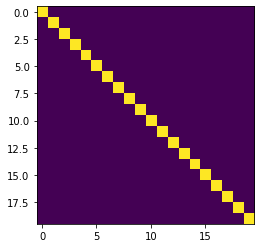

In [54]:
imshow(w0[0])

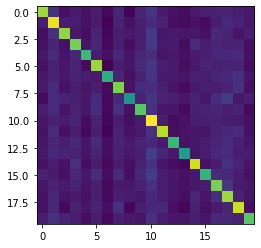

In [55]:
imshow(w1[0])

### 2. Queries, Keys, Values
- Attention is a soft dictionary
- Every key matches a query to some extend
- Not return a specific value, but a mixture of values (with softmax normalized dot products as a mixture of weights)
- In self attention, all keys, queries and values comes from the same set

In [199]:
class SingleHeadSelfAttn(nn.Module):
    def __init__(self, seq_lenght, embed_size, return_attention = False):
        super().__init__()
        self.lenght = seq_lenght
        self.embed = embed_size
        self.return_w = return_attention
        self.transform_q = nn.Linear(self.embed, self.embed)
        self.transform_k = nn.Linear(self.embed, self.embed)
        self.transform_v = nn.Linear(self.embed, self.embed)
        return None
    
    def scaled_dot_attention(self, q, k, v):
        raw_w = torch.bmm(q,k.transpose(1,2))
        raw_w = raw_w/ np.sqrt(self.embed)
        w = F.softmax(raw_w, dim=2)
        out = torch.bmm(w, v)
        if self.return_w:
            return out, w.detach().numpy()
        else:
            return out
    
    def forward(self, x):
        q = self.transform_q(x)
        k = self.transform_k(x)
        v = self.transform_v(x)
        out = self.scaled_dot_attention(q,k,v)
        return out

In [200]:
seq_lenght, embed_size

(20, 300)

In [201]:
x.shape

torch.Size([16, 20, 300])

In [202]:
att = SingleHeadSelfAttn(seq_lenght, embed_size, return_attention=True)

In [203]:
outs, w = att(x)
outs.shape, w.shape

(torch.Size([16, 20, 300]), (16, 20, 20))

In [204]:
w[0]

array([[0.04866564, 0.05307571, 0.05631923, 0.05000139, 0.05032464,
        0.0512806 , 0.04653352, 0.05343568, 0.05104593, 0.05202592,
        0.05050563, 0.04342857, 0.05074209, 0.05141867, 0.04634961,
        0.04906446, 0.04635028, 0.04808216, 0.0502267 , 0.05112353],
       [0.04560511, 0.04957413, 0.05686795, 0.04949437, 0.05134268,
        0.05355142, 0.04719977, 0.05382648, 0.05049339, 0.05048638,
        0.04893049, 0.04203658, 0.04968655, 0.05296049, 0.050453  ,
        0.04983963, 0.04422356, 0.04834776, 0.05432617, 0.05075407],
       [0.04902902, 0.04899746, 0.05419888, 0.05313929, 0.04902532,
        0.05726247, 0.04533409, 0.05293822, 0.04804694, 0.05273312,
        0.05071581, 0.04484954, 0.0479059 , 0.04971744, 0.04945495,
        0.05128388, 0.04522665, 0.05032463, 0.05232645, 0.04749001],
       [0.04838726, 0.05075201, 0.05424774, 0.04781309, 0.04908088,
        0.05639474, 0.04774433, 0.05180538, 0.05210044, 0.05152094,
        0.05016092, 0.04611476, 0.05071174, 0

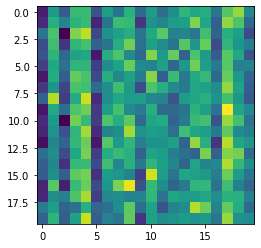

In [207]:
imshow(w[2])